In [1]:
from random import randint

def get_coords(k):
    coords = [(randint(1,k),randint(1,k)) for i in range(1,k)]
    return list(set(coords))


print(get_coords(10))

[(1, 2), (6, 9), (4, 8), (3, 10), (2, 1), (8, 9), (1, 7)]


In [6]:
import mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import math

# Set random seed
np.random.seed(2)

def get_data(algorithm, run_times, t_pct, **args):
    state = []
    fit = []
    dur = []
    for n in range(run_times):
        start_time = datetime.now()
        fitness_func = mlrose.FourPeaks()
        problem_fit = mlrose.DiscreteOpt(length = 100, fitness_fn = fitness_func, maximize = True, max_val = 2)
        _state, _fit = algorithm(problem_fit, **args)
        time_diff = datetime.now() - start_time
        _dur = time_diff.microseconds/1000

        state.append(_state)
        fit.append(_fit)
        dur.append(_dur)
    return np.mean(fit),np.mean(dur)

def by_max_iters(algorithm, run_times, max_iters, **args):
    fit = []
    dur = []
    for i in max_iters:
        _fit, _dur = get_data(algorithm, run_times, max_iters=i, max_attempts=100, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

def by_coords(algorithm, run_times, coords_lists, **args):
    fit = []
    dur = []  
    for coords_list in coords_lists:
        _fit, _dur = get_data(algorithm, run_times, coords_list, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

max_iters=range(1, 50, 5)
run_times=1

coords_lists = [0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
coords_list_len = coords_lists

print(coords_list_len)


[0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


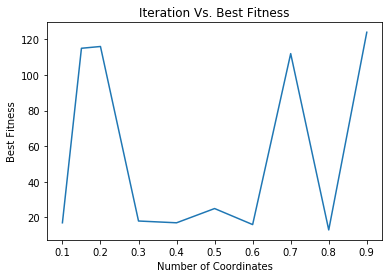

In [7]:
fit_ga, dur_ga = by_coords(mlrose.genetic_alg, run_times, coords_lists)
plt.xlabel('Number of Coordinates')
plt.ylabel('Best Fitness')
plt.plot(coords_list_len, fit_ga)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

/Users/bishwash.aryal/.pyenv/versions/3.6.7/lib/python3.6/site-packages/mlrose/algorithms.py:241: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


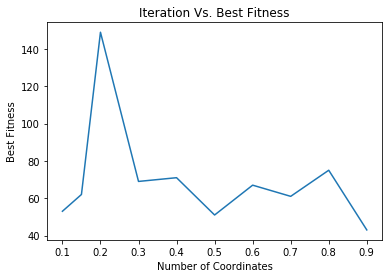

In [8]:
fit_sa, dur_sa = by_coords(mlrose.simulated_annealing, run_times, coords_lists)
plt.xlabel('Number of Coordinates')
plt.ylabel('Best Fitness')
plt.plot(coords_list_len, fit_sa)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

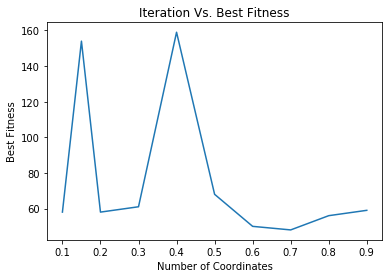

In [9]:
fit_mi, dur_mi = by_coords(mlrose.simulated_annealing, run_times, coords_lists)
plt.xlabel('Number of Coordinates')
plt.ylabel('Best Fitness')
plt.plot(coords_list_len, fit_mi)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

In [10]:
fitness_df = pd.DataFrame(np.column_stack([fit_ga,fit_sa,fit_mi]),columns=['ga','sa','mimic'],index=coords_list_len)
duration_df = pd.DataFrame(np.column_stack([dur_ga,dur_sa,dur_mi]),columns=['ga','sa','mimic'],index=coords_list_len)
print(fitness_df)



         ga     sa  mimic
0.10   17.0   53.0   58.0
0.15  115.0   62.0  154.0
0.20  116.0  149.0   58.0
0.30   18.0   69.0   61.0
0.40   17.0   71.0  159.0
0.50   25.0   51.0   68.0
0.60   16.0   67.0   50.0
0.70  112.0   61.0   48.0
0.80   13.0   75.0   56.0
0.90  124.0   43.0   59.0


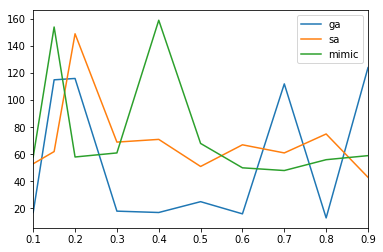

In [11]:
fitness_df.plot()